<a href="https://colab.research.google.com/github/melliaafs/Machine-Learning-1/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [108]:
# Import dataset
# Sesuaikan dengan lokasi file xclara.csv di local komputer
data = pd.read_csv('xclara.csv')

In [109]:
print(data.shape)

(3000, 2)


In [110]:
print(data.head(20))

           V1         V2
0    2.072345  -3.241693
1   17.936710  15.784810
2    1.083576   7.319176
3   11.120670  14.406780
4   23.711550   2.557729
5   24.169930  32.024780
6   21.665780   4.892855
7    4.693684  12.342170
8   19.211910  -1.121366
9    4.230391  -4.441536
10   9.127130  23.605720
11   0.407503  15.297050
12   7.314846   3.309312
13  -3.438403 -12.025270
14  17.639350  -3.212345
15   4.415292  22.815550
16  11.941220   8.122487
17   0.725853   1.806819
18   8.185273  28.132600
19  -5.773587   1.024800


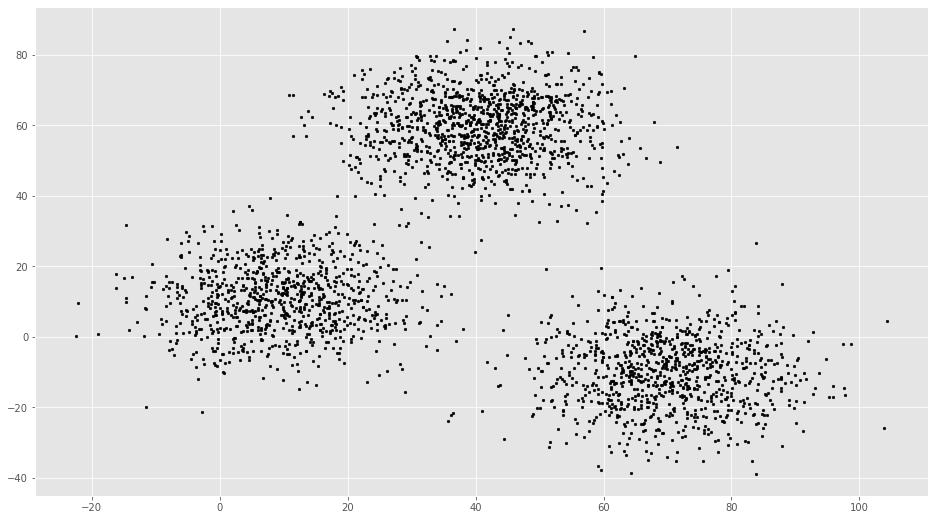

In [111]:
# Plot dataset
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

In [112]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Fitting input data
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels

labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_

# Mencetak nilai centroid

print(C)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


In [113]:
print(labels)

[2 2 2 ... 0 0 0]


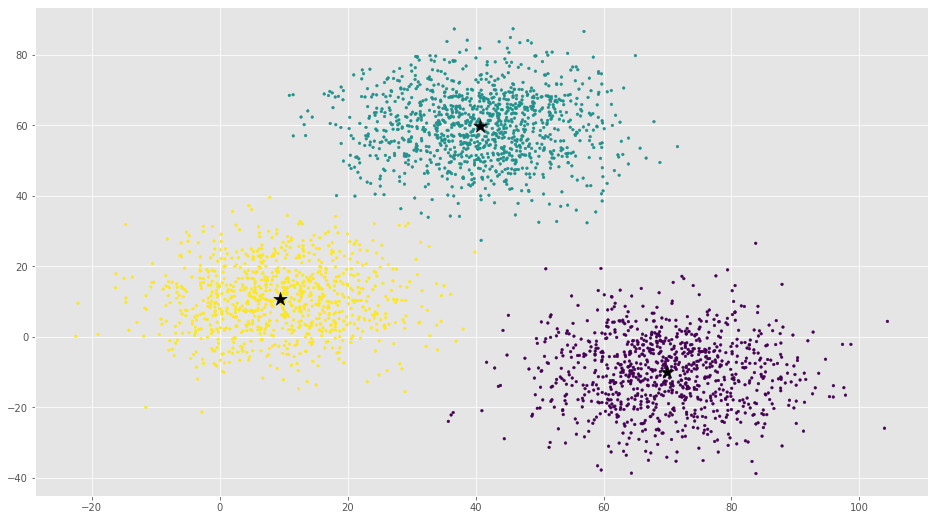

In [114]:
plt.scatter(X[:, 0], X[:, 1], s=7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

**Melakukan Clustering Menggunakan Generate Dataset**

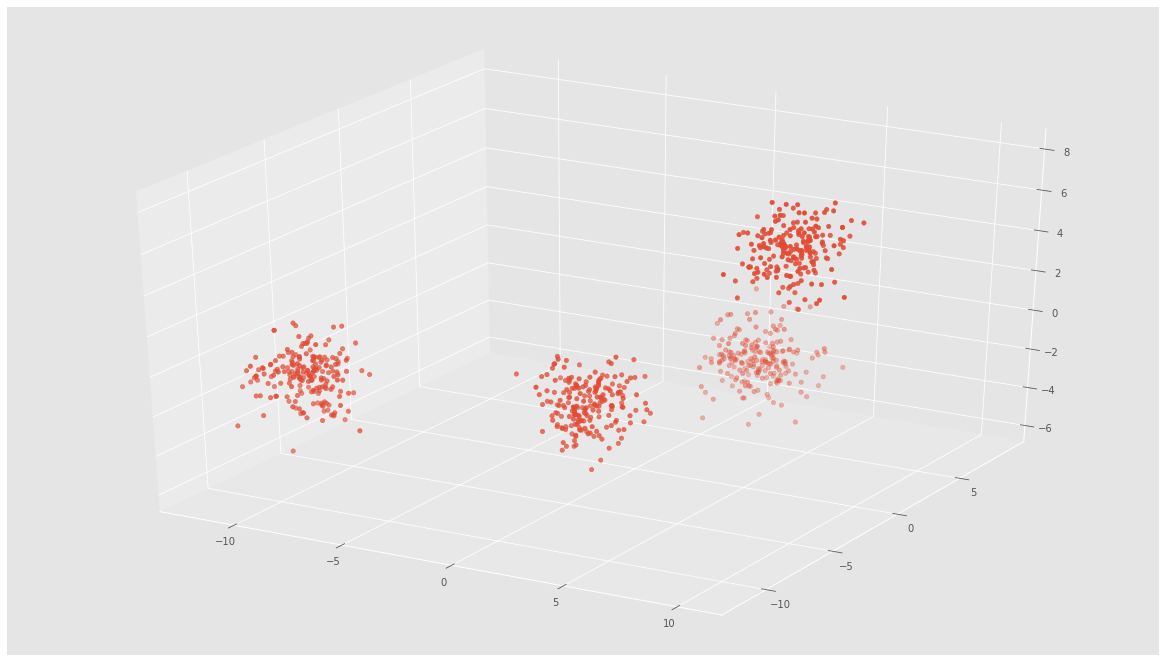

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)

# Men-generate dataset yang terkelompok dalam 4 cluster
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

**Melakukan clustering**

In [116]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

**Plot hasil clustering**

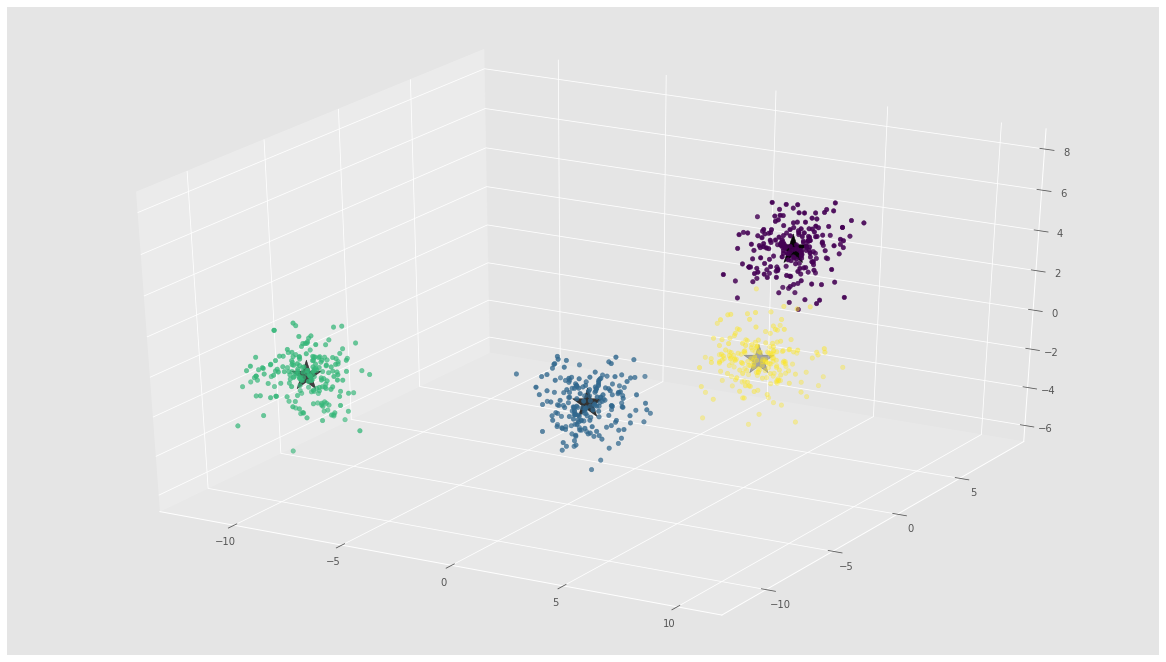

In [117]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

**Melakukan Evaluasi Hasil Clustering**

In [129]:
for k in range (1, 10):
    # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster l(abels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  interia = kmeans.inertia_
  print( "k:",k, " cost:", interia)
print ("")

k: 1  cost: 64114.037153806334
k: 2  cost: 27458.51471250097
k: 3  cost: 13284.539036137652
k: 4  cost: 2477.6124102607027
k: 5  cost: 2314.7840640015556
k: 6  cost: 2160.9174236662247
k: 7  cost: 2023.2292636115449
k: 8  cost: 1860.8705659278862
k: 9  cost: 1753.754910492591



Evaluasi hasil cluster menggunakan silhouette coefficient

In [131]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.24169596794010795